In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

data_path = fr'D:\Pictures\Skin Diseases'
print(os.listdir(data_path))

['Closed Comodone Acne - Whiteheads', 'Cystic Acne', 'Open Comodone Acne - Black Heads', 'Perioral Dermatitis', 'Pustular Acne', 'Rosacea']


In [3]:
(train_ds, val_ds) = tf.keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="both",
    seed = 123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

Found 726 files belonging to 6 classes.
Using 581 files for training.
Using 145 files for validation.


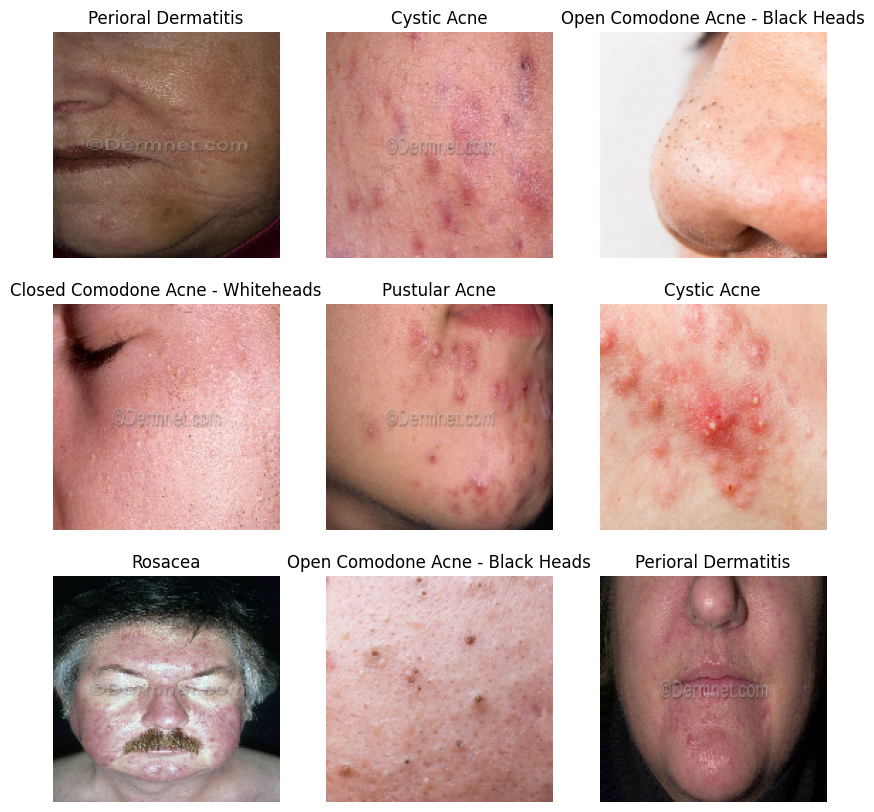

In [4]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_dataset = val_ds.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_ds.prefetch(buffer_size=AUTOTUNE)

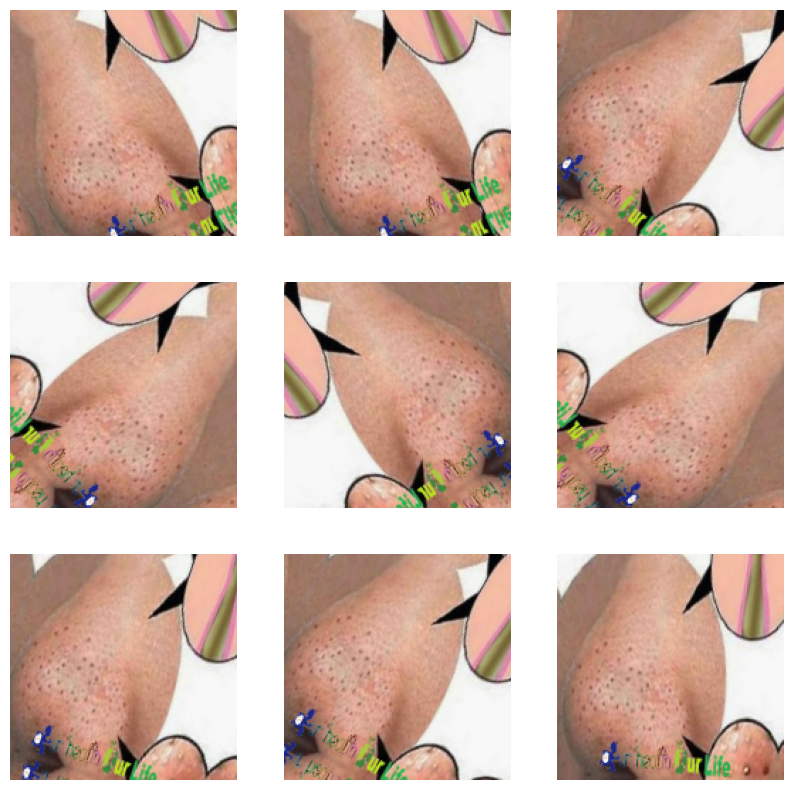

In [7]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')